In [2]:
## Credit Score classification: To predict the credit score of a customer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
# to import dataset
df = pd.read_csv('C:/Users/miche/Desktop/machine_learning/credit_score_classification/train.csv')

C:\Users\miche\AppData\Local\Temp\ipykernel_992\3393032154.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/miche/Desktop/machine_learning/credit_score_classification/train.csv')


In [4]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [5]:
# to remove variables 'ID' and 'customer_ID' as not useful for analysis, SSN represent the social security number of the person
df = df.drop(['ID','Customer_ID','Name','SSN'],axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Type_of_Loan              88592 non-null   object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   object 
 12  Changed_Credit_Limit      100000 non-null  object 
 13  Num_Credit_Inquiries      98035 non-null   fl

In [7]:
df['Annual_Income'].unique()

array(['19114.12', '34847.84', '34847.84_', ..., '20002.88', '39628.99',
       '39628.99_'], dtype=object)

In [8]:
# to remove '-' from variables inthe column and to convert 'Annual income' into float with decimal points
df['Annual_Income'] = df['Annual_Income'].str.replace('_','')

In [9]:
df['Annual_Income'] = df['Annual_Income'].astype('float')

In [10]:
df['Annual_Income'].dtype

dtype('float64')

In [11]:
df['Num_of_Loan'].unique()

array(['4', '1', '3', '967', '-100', '0', '0_', '2', '3_', '2_', '7', '5',
       '5_', '6', '8', '8_', '9', '9_', '4_', '7_', '1_', '1464', '6_',
       '622', '352', '472', '1017', '945', '146', '563', '341', '444',
       '720', '1485', '49', '737', '1106', '466', '728', '313', '843',
       '597_', '617', '119', '663', '640', '92_', '1019', '501', '1302',
       '39', '716', '848', '931', '1214', '186', '424', '1001', '1110',
       '1152', '457', '1433', '1187', '52', '1480', '1047', '1035',
       '1347_', '33', '193', '699', '329', '1451', '484', '132', '649',
       '995', '545', '684', '1135', '1094', '1204', '654', '58', '348',
       '614', '1363', '323', '1406', '1348', '430', '153', '1461', '905',
       '1312', '1424', '1154', '95', '1353', '1228', '819', '1006', '795',
       '359', '1209', '590', '696', '1185_', '1465', '911', '1181', '70',
       '816', '1369', '143', '1416', '455', '55', '1096', '1474', '420',
       '1131', '904', '89', '1259', '527', '1241', '449', 

In [12]:
df['Num_of_Loan'] = df['Num_of_Loan'].str.replace('_','')

In [13]:
df['Num_of_Loan'] = df['Num_of_Loan'].astype('int')

In [14]:
df['Num_of_Loan'].dtype

dtype('int32')

In [15]:
df['Num_of_Delayed_Payment'].unique()

array(['7', nan, '4', '8_', '6', '1', '-1', '3_', '0', '8', '5', '3', '9',
       '12', '15', '17', '10', '2', '2_', '11', '14', '20', '22', '13',
       '13_', '14_', '16', '12_', '18', '19', '23', '24', '21', '3318',
       '3083', '22_', '1338', '4_', '26', '11_', '3104', '21_', '25',
       '10_', '183_', '9_', '1106', '834', '19_', '24_', '17_', '23_',
       '2672', '20_', '2008', '-3', '538', '6_', '1_', '16_', '27', '-2',
       '3478', '2420', '15_', '707', '708', '26_', '18_', '3815', '28',
       '5_', '1867', '2250', '1463', '25_', '7_', '4126', '2882', '1941',
       '2655', '2628', '132', '3069', '306', '0_', '3539', '3684', '1823',
       '4128', '1946', '827', '2297', '2566', '904', '182', '929', '3568',
       '2503', '1552', '2812', '1697', '3764', '851', '3905', '923', '88',
       '1668', '3253', '808', '2689', '3858', '642', '3457', '1402',
       '1732', '3154', '847', '3037', '2204', '3103', '1063', '2056',
       '1282', '1841', '2569_', '211', '793', '3484', '4

In [16]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace('_','')

In [18]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype('float')

In [19]:
df['Num_of_Delayed_Payment'].dtype

dtype('float64')

In [20]:
df['Changed_Credit_Limit']

0        11.27
1        11.27
2            _
3         6.27
4        11.27
         ...  
99995     11.5
99996     11.5
99997     11.5
99998     11.5
99999     11.5
Name: Changed_Credit_Limit, Length: 100000, dtype: object

In [21]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace('_','np.nan')

In [22]:
df['Changed_Credit_Limit'].value_counts()

Changed_Credit_Limit
np.nan                2091
8.22                   133
11.5                   127
11.32                  126
7.35                   121
                      ... 
-1.84                    1
0.8899999999999999       1
28.06                    1
1.5599999999999996       1
21.17                    1
Name: count, Length: 4384, dtype: int64

In [23]:
df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'], errors='coerce')

In [24]:
df['Outstanding_Debt'].unique()

array(['809.98', '605.03', '1303.01', ..., '3571.7_', '3571.7', '502.38'],
      dtype=object)

In [25]:
# to remove '_' from columns
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace("_","")

In [26]:
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype('float')

In [28]:
df['Outstanding_Debt'].dtype

dtype('float64')

In [29]:
df['Credit_History_Age'] 

0         22 Years and 1 Months
1                           NaN
2         22 Years and 3 Months
3         22 Years and 4 Months
4         22 Years and 5 Months
                  ...          
99995     31 Years and 6 Months
99996     31 Years and 7 Months
99997     31 Years and 8 Months
99998     31 Years and 9 Months
99999    31 Years and 10 Months
Name: Credit_History_Age, Length: 100000, dtype: object

In [32]:
# to replace missing values in Credit_history_age from 'nan' to 'none' before the lambda operation
df['Credit_History_Age'] = df['Credit_History_Age'].fillna("none")

In [33]:
df['Credit_History_Age']

0         22 Years and 1 Months
1                          none
2         22 Years and 3 Months
3         22 Years and 4 Months
4         22 Years and 5 Months
                  ...          
99995     31 Years and 6 Months
99996     31 Years and 7 Months
99997     31 Years and 8 Months
99998     31 Years and 9 Months
99999    31 Years and 10 Months
Name: Credit_History_Age, Length: 100000, dtype: object

In [34]:
df['Credit_History_Age'].dtype

dtype('O')

In [35]:
# using lambda function to .split the first 2 digits into a new column 'credit_historyage'
df['credit_historyage'] = df['Credit_History_Age'].apply(lambda x:x.split(" ")[0])

In [36]:
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,credit_historyage
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,22
1,February,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,809.98,31.944960,none,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,none
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,22
3,April,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good,22
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good,22


In [37]:
# to remove original column 'Credit_History_Age' from dataset after extracting
df = df.drop('Credit_History_Age',axis=1)

In [38]:
# to convert 'none' into missing values in 'credit_historyage'column
df['credit_historyage'] = df['credit_historyage'].replace("none","np.nan")

In [39]:
df['credit_historyage']

0            22
1        np.nan
2            22
3            22
4            22
          ...  
99995        31
99996        31
99997        31
99998        31
99999        31
Name: credit_historyage, Length: 100000, dtype: object

In [40]:
pd.DataFrame(df['Amount_invested_monthly'].value_counts())

,count
Amount_invested_monthly,
__10000__,4305
0.0,169
80.41529543900253,1
36.66235139442514,1
89.7384893604547,1
...,...
36.541908593249026,1
93.45116318631192,1
140.80972223052834,1


In [41]:
# to remove __ in all columns
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].str.replace("__","")

In [42]:
# to convert to a 'float' variable 
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype('float')

In [43]:
df['Amount_invested_monthly'].dtype

dtype('float64')

In [44]:
df['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

In [45]:
# to replace '!@9#%8' as missing values
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace("!@9#%8", "np.nan")

In [46]:
df['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', 'np.nan',
       'High_spent_Large_value_payments'], dtype=object)

In [47]:
pd.DataFrame(df['Monthly_Balance'].value_counts())

,count
Monthly_Balance,
__-333333333333333333333333333__,9
312.49408867943663,1
415.32532309844316,1
252.08489793906085,1
254.9709216273975,1
...,...
366.2890379762706,1
151.1882696261166,1
306.75027851710234,1


In [48]:
# to convert 'Monthly_balance' into 'float' variable
df['Monthly_Balance'] = df['Monthly_Balance'].str.replace("__","")

In [49]:
# to convert variable type into 'float'
df['Monthly_Balance'] = df['Monthly_Balance'].astype('float')

In [50]:
df['Monthly_Balance'].dtype

dtype('float64')

In [51]:
# to check for duplicated values in dataset
duplicates = df[df.duplicated()]

In [52]:
# there are no duplicated data in dataset
duplicates

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,credit_historyage


In [53]:
# to check for missing values
df.isnull().sum()

Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              2868
Credit_Score                    0
credit_historyage               0
dtype: int64

In [54]:
# to check for % missing values in each columns
# 'Monthly_Inhand_Salary' and 'Type_of_Loan' has the highest % of missing values
100*df.isnull().sum()/len(df)

Month                        0.000
Age                          0.000
Occupation                   0.000
Annual_Income                0.000
Monthly_Inhand_Salary       15.002
Num_Bank_Accounts            0.000
Num_Credit_Card              0.000
Interest_Rate                0.000
Num_of_Loan                  0.000
Type_of_Loan                11.408
Delay_from_due_date          0.000
Num_of_Delayed_Payment       7.002
Changed_Credit_Limit         2.091
Num_Credit_Inquiries         1.965
Credit_Mix                   0.000
Outstanding_Debt             0.000
Credit_Utilization_Ratio     0.000
Payment_of_Min_Amount        0.000
Total_EMI_per_month          0.000
Amount_invested_monthly      4.479
Payment_Behaviour            0.000
Monthly_Balance              2.868
Credit_Score                 0.000
credit_historyage            0.000
dtype: float64

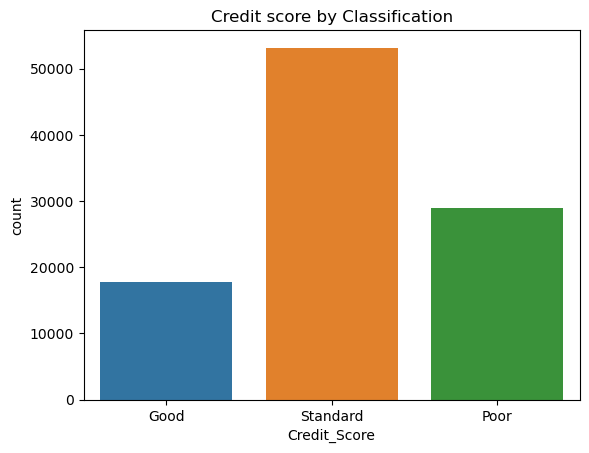

In [55]:
# to plot a count plot of the target variable 'Credit_Score'
sns.countplot(data=df, x='Credit_Score')
plt.title('Credit score by Classification');

In [56]:
# this no class imbalanced of target variable in the categories
pd.DataFrame(df['Credit_Score'].value_counts())

,count
Credit_Score,
Standard,53174
Poor,28998
Good,17828


In [57]:
df['Age'].unique()

array(['23', '-500', '28_', ..., '4808_', '2263', '1342'], dtype=object)

In [58]:
# to remove '_' from column and convert it into integer
df['Age'] = df['Age'].str.replace("_","")

In [59]:
df['Age'] = df['Age'].astype('int')

In [60]:
df['Age'].describe()

count    100000.000000
mean        110.649700
std         686.244717
min        -500.000000
25%          24.000000
50%          33.000000
75%          42.000000
max        8698.000000
Name: Age, dtype: float64

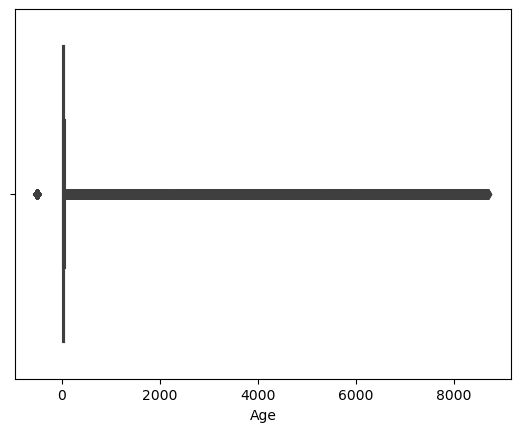

In [61]:
# 'Age' has many outlier values, it starts from -500, ends at 8698, there are too many erronous data in 'Age' column
sns.boxplot(data=df, x='Age');

In [62]:
# to remove the outlier values in 'age' using the interquartile range method
# First quartile
Q1_25 = df['Age'].quantile(0.25)
Q1_25

24.0

In [63]:
# 3rd quartile
Q3_75 = df['Age'].quantile(0.75)
Q3_75

42.0

In [64]:
# interquartile range for 'Age', IQR
IQR = Q3_75 - Q1_25
IQR

18.0

In [65]:
# 'Age' upper limits
age_upper_limit = 42 + 1.5 *18
age_upper_limit

69.0

In [66]:
# 'Age' lower limits
age_lower_limit = 24 - 1.5*18
age_lower_limit 

-3.0

In [67]:
# finding upper limit outliers, 'Age'
age_upper_array = df[df['Age'] > age_upper_limit]

In [68]:
# finding lower limit outliers,'Age'
age_lower_array = df[df['Age'] > age_lower_limit]

In [69]:
# to remove outliers in 'Age' columns
df = df[(df['Age'] < age_upper_limit) & (df['Age'] > age_lower_limit)]
df.shape

(97219, 24)

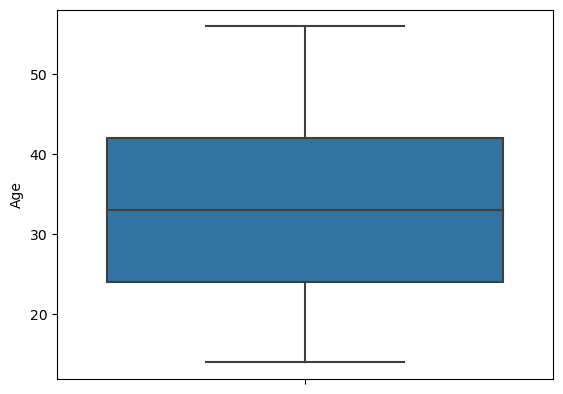

In [70]:
# to see if the outliers in 'age' have been removed, all outlier values in 'age' have been removed
sns.boxplot(data=df, y='Age');

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97219 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     97219 non-null  object 
 1   Age                       97219 non-null  int32  
 2   Occupation                97219 non-null  object 
 3   Annual_Income             97219 non-null  float64
 4   Monthly_Inhand_Salary     82623 non-null  float64
 5   Num_Bank_Accounts         97219 non-null  int64  
 6   Num_Credit_Card           97219 non-null  int64  
 7   Interest_Rate             97219 non-null  int64  
 8   Num_of_Loan               97219 non-null  int32  
 9   Type_of_Loan              86145 non-null  object 
 10  Delay_from_due_date       97219 non-null  int64  
 11  Num_of_Delayed_Payment    90395 non-null  float64
 12  Changed_Credit_Limit      95183 non-null  float64
 13  Num_Credit_Inquiries      95313 non-null  float64
 14  Credit_Mix 

In [72]:
df['credit_historyage']

0            22
1        np.nan
3            22
4            22
5            22
          ...  
99995        31
99996        31
99997        31
99998        31
99999        31
Name: credit_historyage, Length: 97219, dtype: object

In [73]:
# to remove 'np.nan' from 'credit_historyage' column
df = df[df['credit_historyage'] !='np.nan']

In [74]:
df['credit_historyage']

0        22
3        22
4        22
5        22
6        22
         ..
99995    31
99996    31
99997    31
99998    31
99999    31
Name: credit_historyage, Length: 88428, dtype: object

In [75]:
# to convert 'credit_historyage' into an integer
df['credit_historyage'] = df['credit_historyage'].astype('int')

In [76]:
df['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      22563
High_spent_Medium_value_payments    15510
Low_spent_Medium_value_payments     12266
High_spent_Large_value_payments     12147
High_spent_Small_value_payments     10025
Low_spent_Large_value_payments       9211
np.nan                               6706
Name: count, dtype: int64

In [77]:
# to remove 'np.nan' from column
df = df[df['Payment_Behaviour'] != 'np.nan']

In [78]:
df['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Large_value_payments'], dtype=object)

In [79]:
100*df.isnull().sum()/len(df)

Month                        0.000000
Age                          0.000000
Occupation                   0.000000
Annual_Income                0.000000
Monthly_Inhand_Salary       15.017988
Num_Bank_Accounts            0.000000
Num_Credit_Card              0.000000
Interest_Rate                0.000000
Num_of_Loan                  0.000000
Type_of_Loan                11.376374
Delay_from_due_date          0.000000
Num_of_Delayed_Payment       6.946722
Changed_Credit_Limit         2.098578
Num_Credit_Inquiries         1.944397
Credit_Mix                   0.000000
Outstanding_Debt             0.000000
Credit_Utilization_Ratio     0.000000
Payment_of_Min_Amount        0.000000
Total_EMI_per_month          0.000000
Amount_invested_monthly      4.471256
Payment_Behaviour            0.000000
Monthly_Balance              2.831551
Credit_Score                 0.000000
credit_historyage            0.000000
dtype: float64

In [80]:
# to select out the numeric variables
df.select_dtypes(['int','float'])

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,credit_historyage
0,23,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,809.98,26.822620,49.574949,80.415295,312.494089,22
3,23,19114.12,NaN,3,4,3,4,5,4.0,6.27,4.0,809.98,31.377862,49.574949,199.458074,223.451310,22
4,23,19114.12,1824.843333,3,4,3,4,6,NaN,11.27,4.0,809.98,24.797347,49.574949,41.420153,341.489231,22
6,23,19114.12,1824.843333,3,4,3,4,3,8.0,11.27,4.0,809.98,22.537593,49.574949,178.344067,244.565317,22
8,28,34847.84,3037.986667,2,4,6,1,3,4.0,5.42,2.0,605.03,24.464031,18.816215,104.291825,470.690627,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,25,39628.99,3359.415833,4,6,7,2,20,6.0,9.50,3.0,502.38,39.323569,35.104023,140.581403,NaN,31
99995,25,39628.99,3359.415833,4,6,7,2,23,7.0,11.50,3.0,502.38,34.663572,35.104023,60.971333,NaN,31
99996,25,39628.99,3359.415833,4,6,7,2,18,7.0,11.50,3.0,502.38,40.565631,35.104023,54.185950,NaN,31
99997,25,39628.99,3359.415833,4,6,5729,2,27,6.0,11.50,3.0,502.38,41.255522,35.104023,24.028477,NaN,31


In [81]:
# to see the correlation of all numeric variables
df.select_dtypes(['int','float']).corr()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,credit_historyage
Age,1.000000,0.006645,0.090622,-0.000516,-0.007564,-0.002686,-0.008436,-0.174360,0.002339,-0.155566,-0.007054,-0.202413,0.023891,0.001274,0.005641,-0.003391,0.233904
Annual_Income,0.006645,1.000000,0.027937,-0.003831,0.002045,-0.004831,-0.003987,-0.008506,0.002858,0.000277,0.001946,-0.001434,0.008019,-0.003271,-0.005670,0.000825,-0.002317
Monthly_Inhand_Salary,0.090622,0.027937,1.000000,-0.011737,-0.006536,-0.006203,-0.010747,-0.249529,-0.000318,-0.175353,-0.008998,-0.271164,0.171368,0.006926,0.062692,-0.002190,0.273357
Num_Bank_Accounts,-0.000516,-0.003831,-0.011737,1.000000,-0.000967,-0.005226,0.000396,0.015765,-0.003669,0.006707,-0.001122,0.016709,-0.002198,-0.000545,0.004030,0.001121,-0.011278
Num_Credit_Card,-0.007564,0.002045,-0.006536,-0.000967,1.000000,-0.003935,0.001578,0.008372,0.003893,0.006343,-0.003419,0.006599,-0.003724,0.001404,-0.002197,0.001348,-0.005422
Interest_Rate,-0.002686,-0.004831,-0.006203,-0.005226,-0.003935,1.000000,-0.001779,0.011227,0.004479,0.002150,0.000122,0.012230,-0.003122,0.001738,-0.000081,0.001298,-0.010815
Num_of_Loan,-0.008436,-0.003987,-0.010747,0.000396,0.001578,-0.001779,1.000000,0.014120,0.011182,0.016579,-0.002517,0.026237,-0.004590,0.002930,-0.001011,-0.000116,-0.024639
Delay_from_due_date,-0.174360,-0.008506,-0.249529,0.015765,0.008372,0.011227,0.014120,1.000000,0.010599,0.293535,0.011679,0.572775,-0.062597,-0.005855,-0.013436,0.003819,-0.490397
Num_of_Delayed_Payment,0.002339,0.002858,-0.000318,-0.003669,0.003893,0.004479,0.011182,0.010599,1.000000,0.007965,0.000287,0.008636,-0.001687,0.000109,-0.000844,0.000947,-0.007603
Changed_Credit_Limit,-0.155566,0.000277,-0.175353,0.006707,0.006343,0.002150,0.016579,0.293535,0.007965,1.000000,0.004266,0.458856,-0.047270,-0.002429,-0.012027,-0.002565,-0.423745


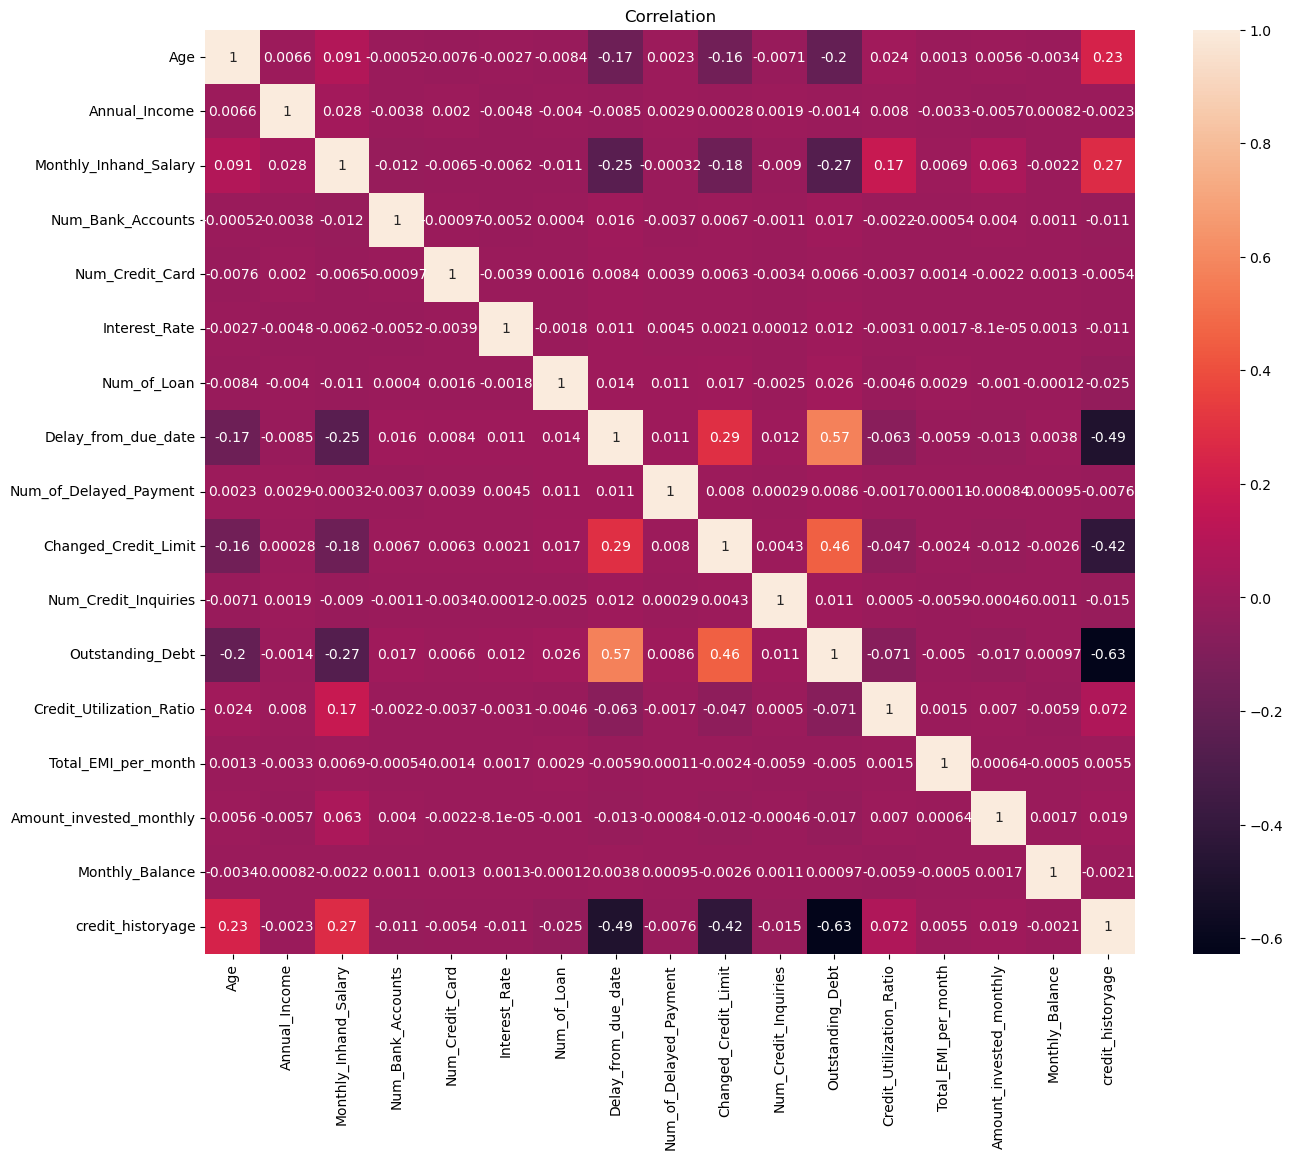

In [82]:
# to visualise all correlation of numeric variables in a heatmap
plt.figure(figsize=(15,12), dpi=100)
sns.heatmap(data=df.select_dtypes(['int','float']).corr(), annot=True)
plt.title('Correlation');

In [83]:
# to view categorical variables in dataset
df.select_dtypes('object')

,Month,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,January,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",_,No,High_spent_Small_value_payments,Good
3,April,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Small_value_payments,Good
4,May,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,High_spent_Medium_value_payments,Good
6,July,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Small_value_payments,Good
8,January,_______,Credit-Builder Loan,Good,No,Low_spent_Small_value_payments,Standard
...,...,...,...,...,...,...,...
99994,March,Mechanic,"Auto Loan, and Student Loan",_,No,High_spent_Medium_value_payments,Poor
99995,April,Mechanic,"Auto Loan, and Student Loan",_,No,High_spent_Large_value_payments,Poor
99996,May,Mechanic,"Auto Loan, and Student Loan",_,No,High_spent_Medium_value_payments,Poor
99997,June,Mechanic,"Auto Loan, and Student Loan",Good,No,High_spent_Large_value_payments,Poor


In [84]:
df['Age'].describe()

count    81722.000000
mean        33.335197
std         10.779654
min         14.000000
25%         24.000000
50%         33.000000
75%         42.000000
max         56.000000
Name: Age, dtype: float64

In [85]:
# to separate age range into different categories, using a def custom function
def age_categories(s):
    if 14 <= s <= 24:
        return "14 to 24"
    if 25 <= s <= 35:
        return "25 to 35"
    if 36 <= s <= 46:
        return "36 to 46"
    if 47 <= s:
        return "above 47"

In [86]:
# to .apply() a custom function
df['age_categories'] = df['Age'].apply(age_categories)

In [87]:
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,credit_historyage,age_categories
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,22,14 to 24
3,April,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,22,14 to 24
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,22,14 to 24
6,July,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,809.98,22.537593,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good,22,14 to 24
8,January,28,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,...,605.03,24.464031,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard,26,25 to 35


In [ ]:
df['age_categories'].unique()

In [88]:
age_categories_order =['14 to 24',
                       '25 to 35',
                       '36 to 46',
                       'above 47']

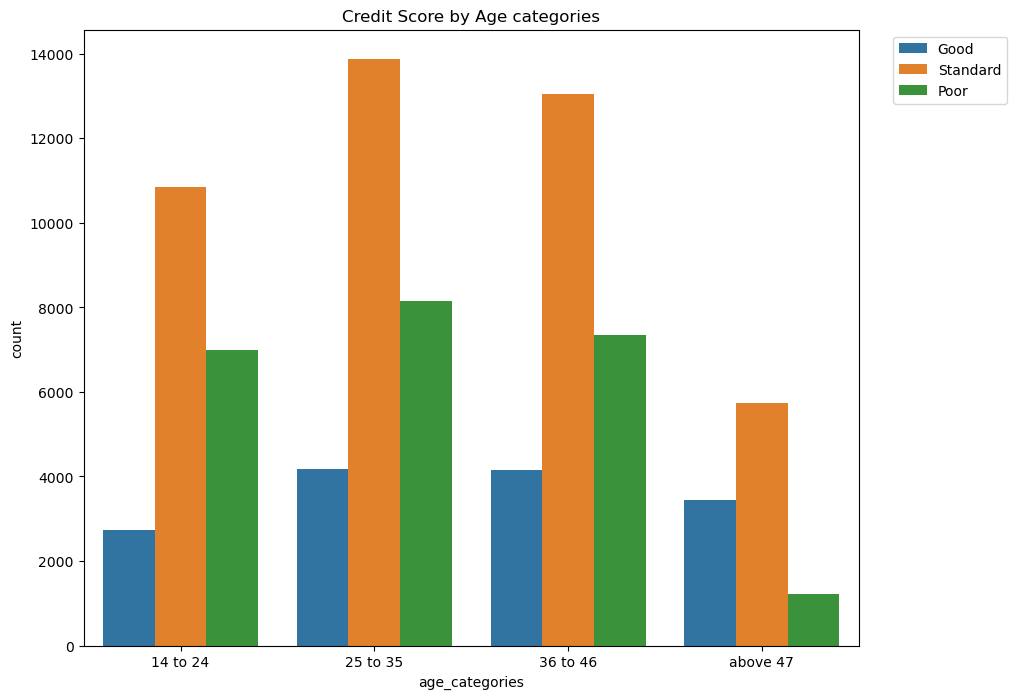

In [89]:
# to see credit score by different age group
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='age_categories', order = age_categories_order,  hue='Credit_Score')
plt.legend(bbox_to_anchor=(1.2,1.0))
plt.title('Credit Score by Age categories');

In [90]:
# customers aged 25 to 35 years has the best credit score, followed by '36 to 46'
pd.DataFrame(df.groupby(['age_categories','Credit_Score'])['Credit_Score'].count())

Credit_Score
age_categories Credit_Score              
14 to 24       Good                  2724
               Poor                  6988
               Standard             10850
25 to 35       Good                  4177
               Poor                  8151
               Standard             13875
36 to 46       Good                  4164
               Poor                  7353
               Standard             13043
above 47       Good                  3448
               Poor                  1214
               Standard              5735

In [91]:
df['Occupation'].value_counts()

Occupation
_______          5804
Lawyer           5342
Architect        5193
Mechanic         5152
Teacher          5150
Accountant       5143
Scientist        5127
Engineer         5118
Entrepreneur     5099
Media_Manager    5065
Developer        5023
Journalist       4991
Doctor           4981
Manager          4886
Musician         4857
Writer           4791
Name: count, dtype: int64

In [92]:
# Occupation has '_______', to remove _____ from the column
df['Occupation'] = df['Occupation'].str.replace('_______','unknown')

In [93]:
df['Occupation'].value_counts()

Occupation
unknown          5804
Lawyer           5342
Architect        5193
Mechanic         5152
Teacher          5150
Accountant       5143
Scientist        5127
Engineer         5118
Entrepreneur     5099
Media_Manager    5065
Developer        5023
Journalist       4991
Doctor           4981
Manager          4886
Musician         4857
Writer           4791
Name: count, dtype: int64

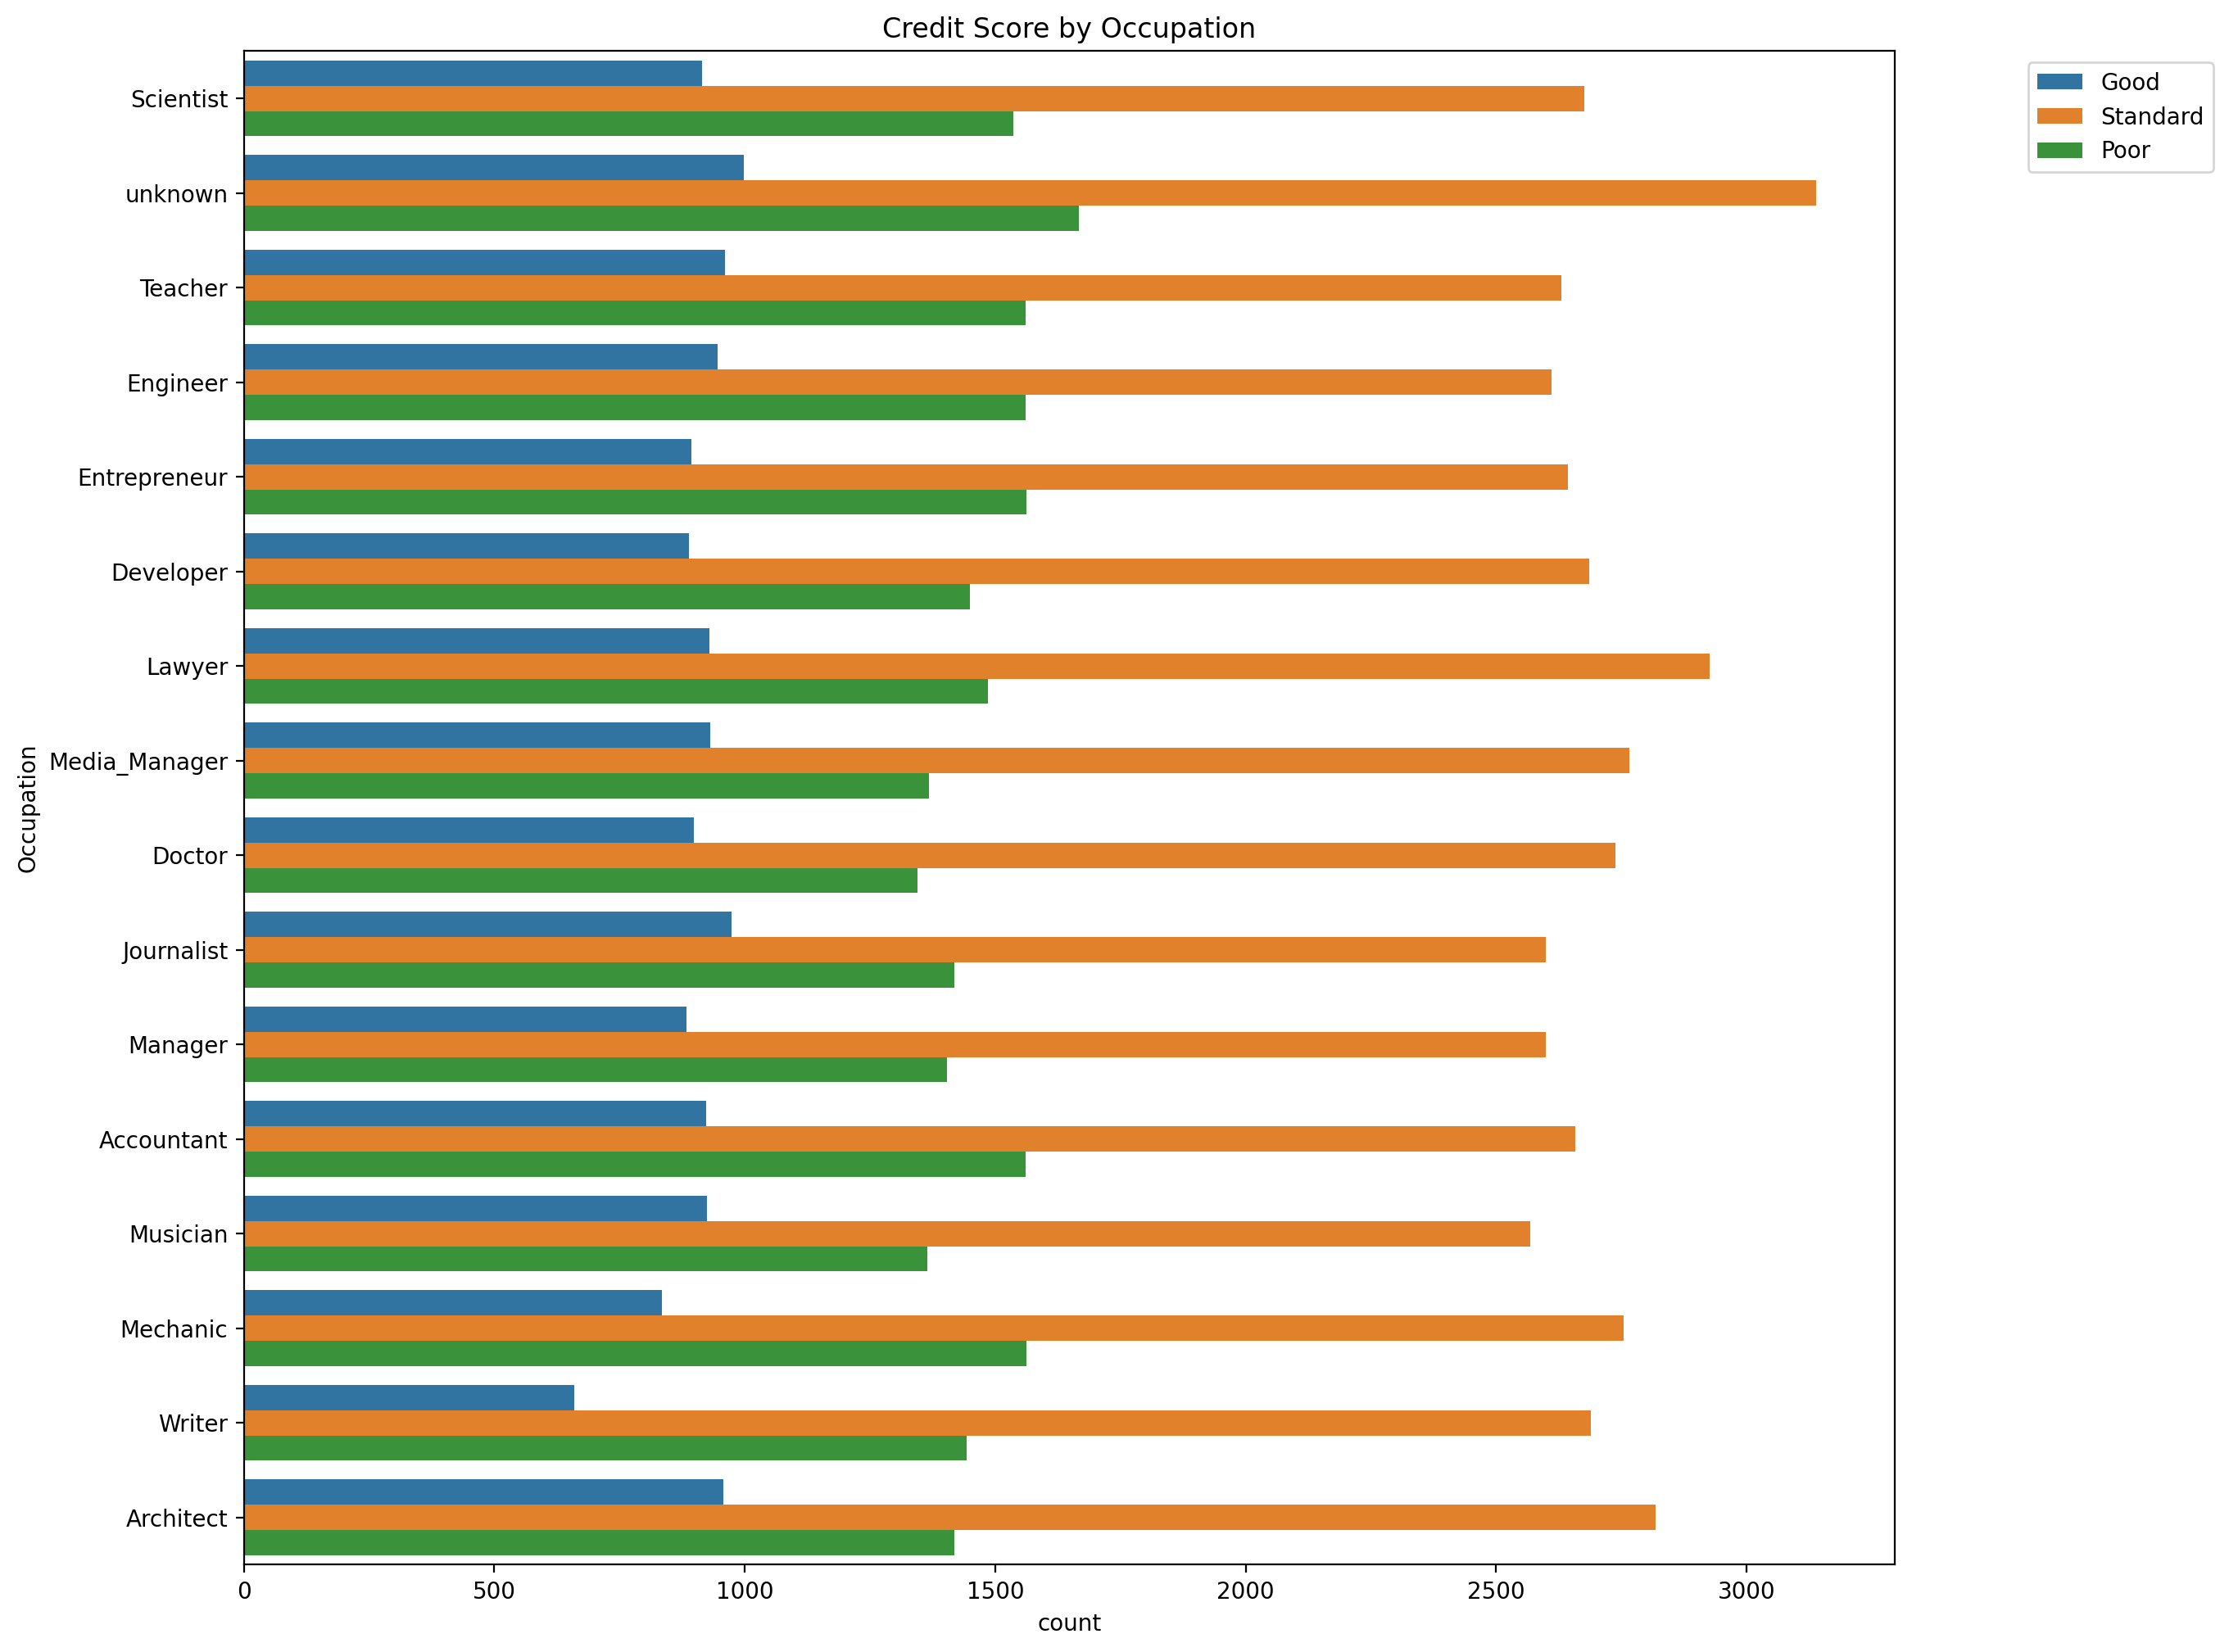

In [96]:
# it is observed that 'Teacher' have 'Good' credit score
plt.figure(figsize=(13,12), dpi=200)
sns.countplot(data=df, y='Occupation', hue='Credit_Score')
plt.legend(bbox_to_anchor=(1.2,1.0))
plt.title('Credit Score by Occupation');

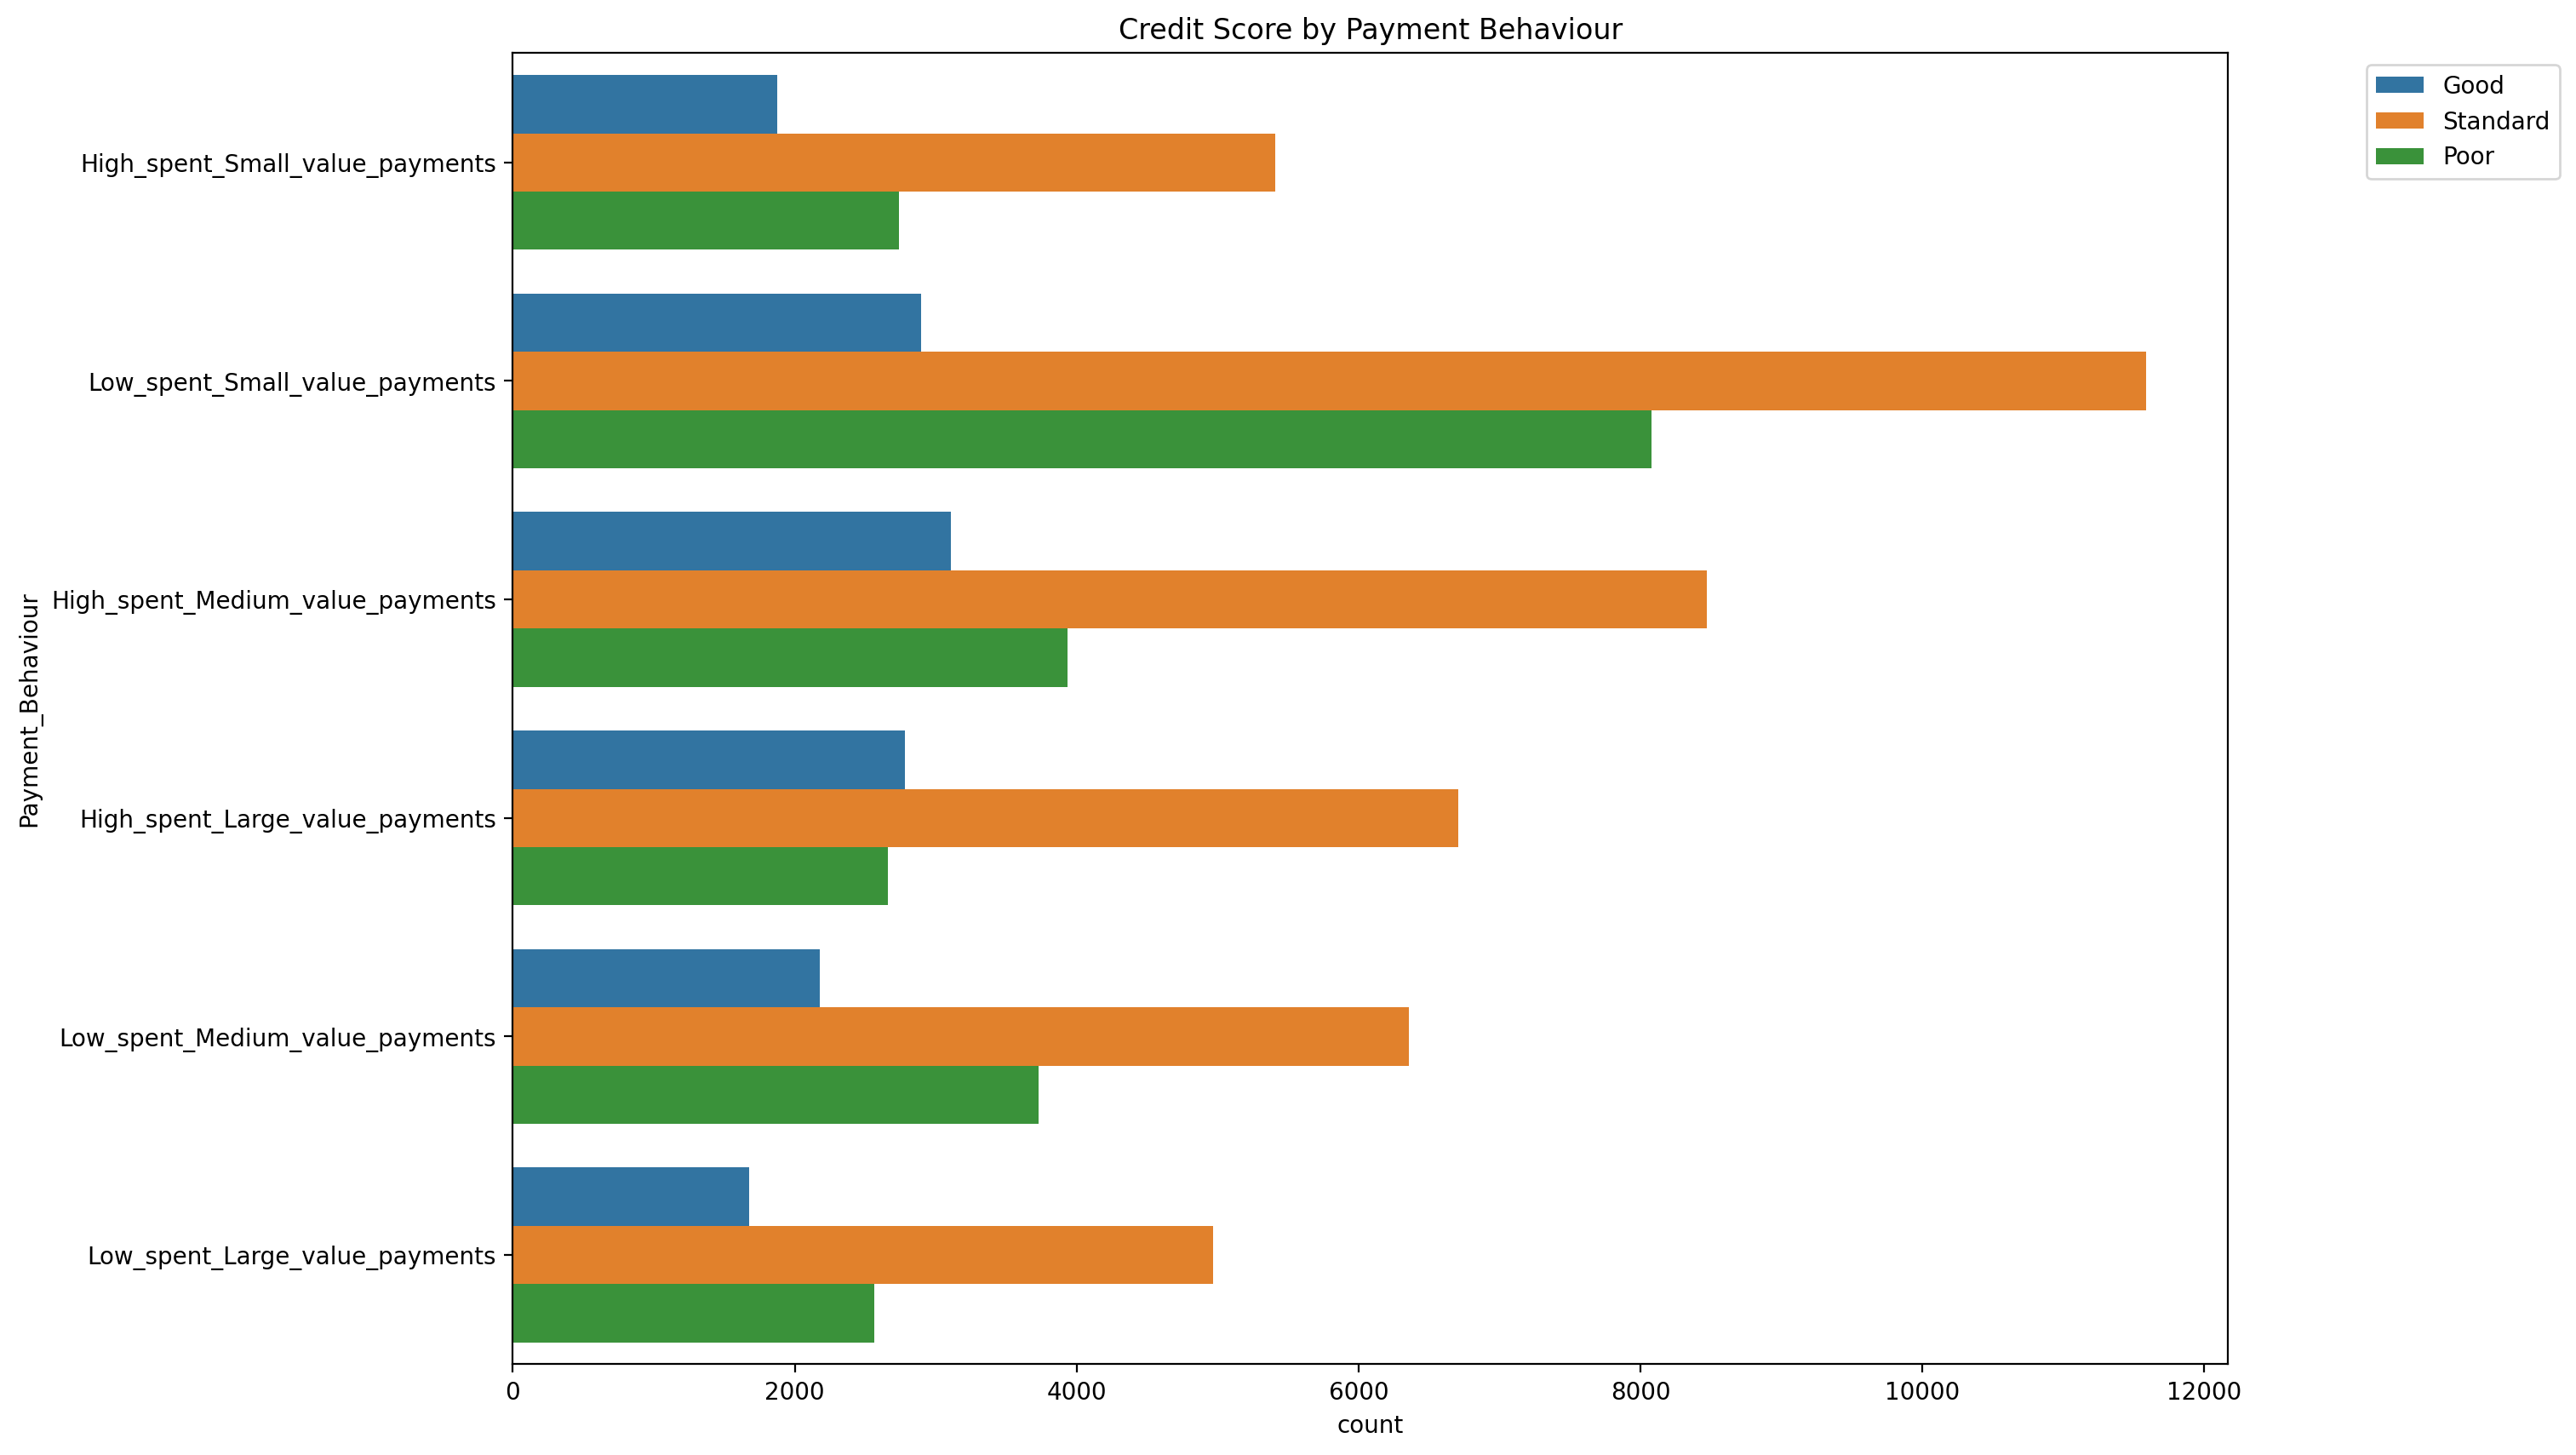

In [98]:
plt.figure(figsize=(13,10), dpi=200)
sns.countplot(data=df, y='Payment_Behaviour', hue='Credit_Score')
plt.legend(bbox_to_anchor=(1.2,1.0))
plt.title('Credit Score by Payment Behaviour');

In [99]:
df['Credit_Mix'].value_counts()

Credit_Mix
Standard    29853
Good        19859
_           16517
Bad         15493
Name: count, dtype: int64

In [100]:
# to replace '_' as unknown
df['Credit_Mix'] = df['Credit_Mix'].str.replace("_", 'unknown')

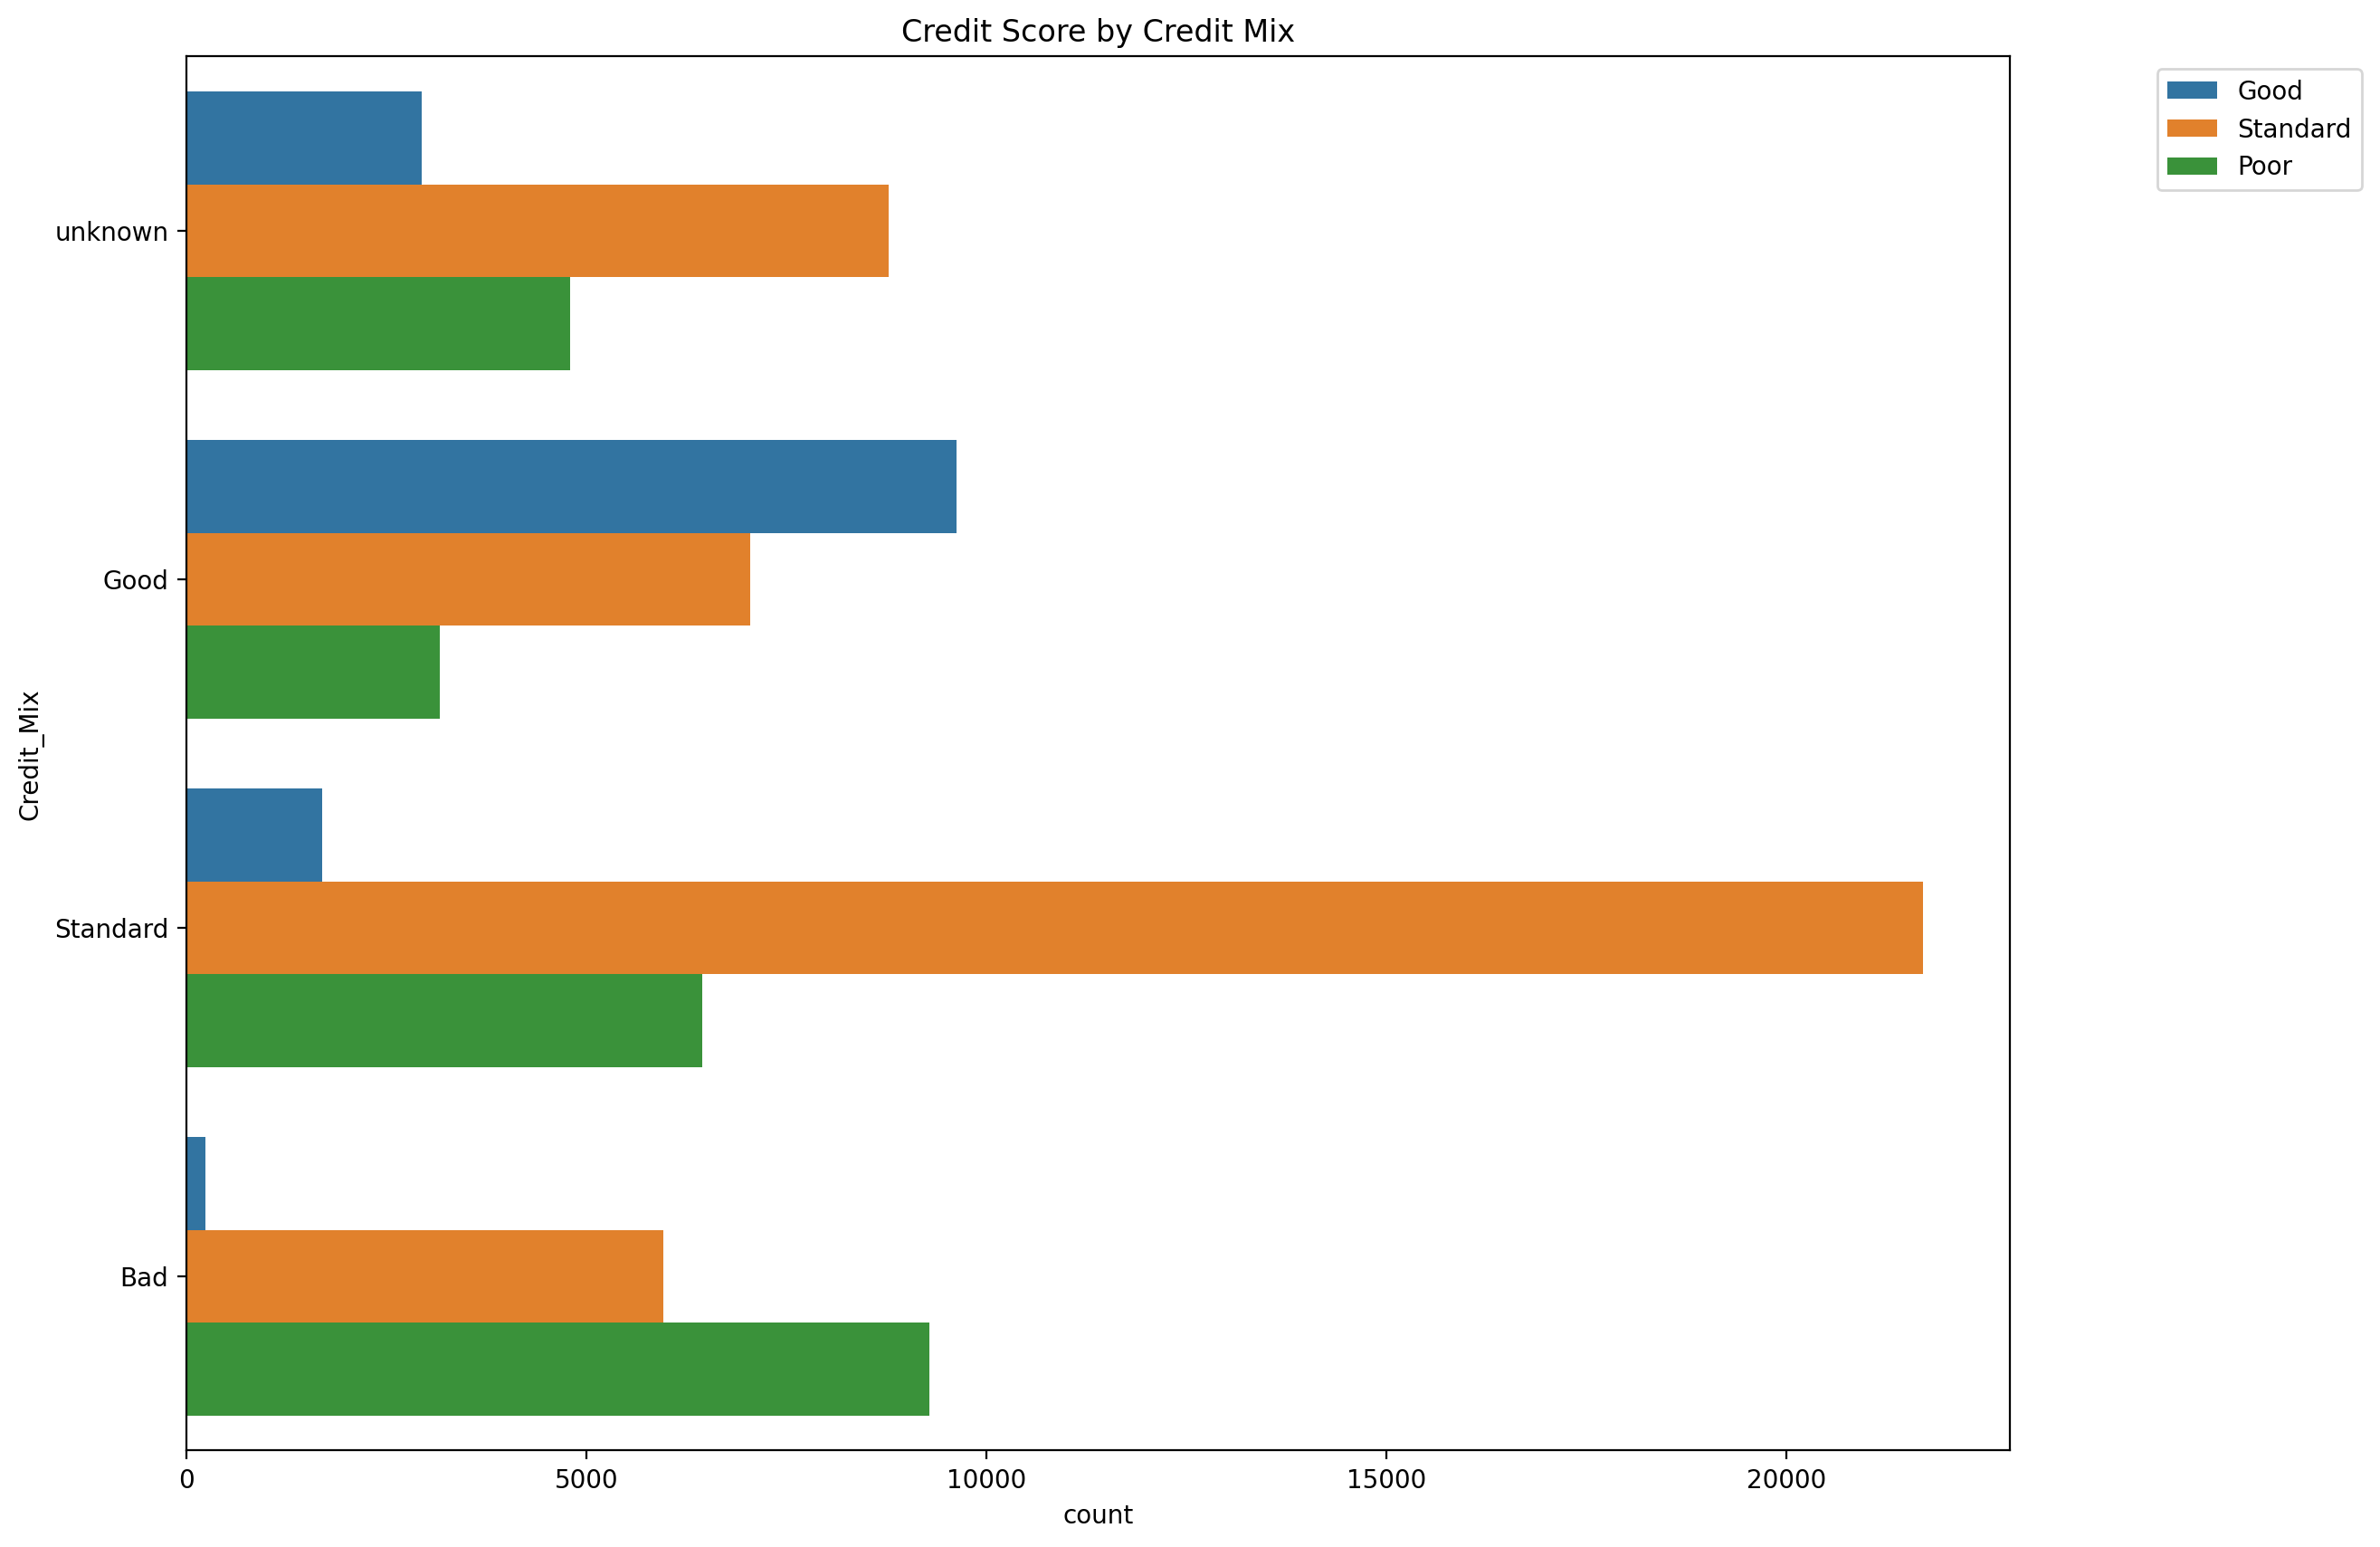

In [101]:
plt.figure(figsize=(13,10), dpi=200)
sns.countplot(data=df, y='Credit_Mix', hue='Credit_Score')
plt.legend(bbox_to_anchor=(1.2,1.0))
plt.title('Credit Score by Credit Mix');

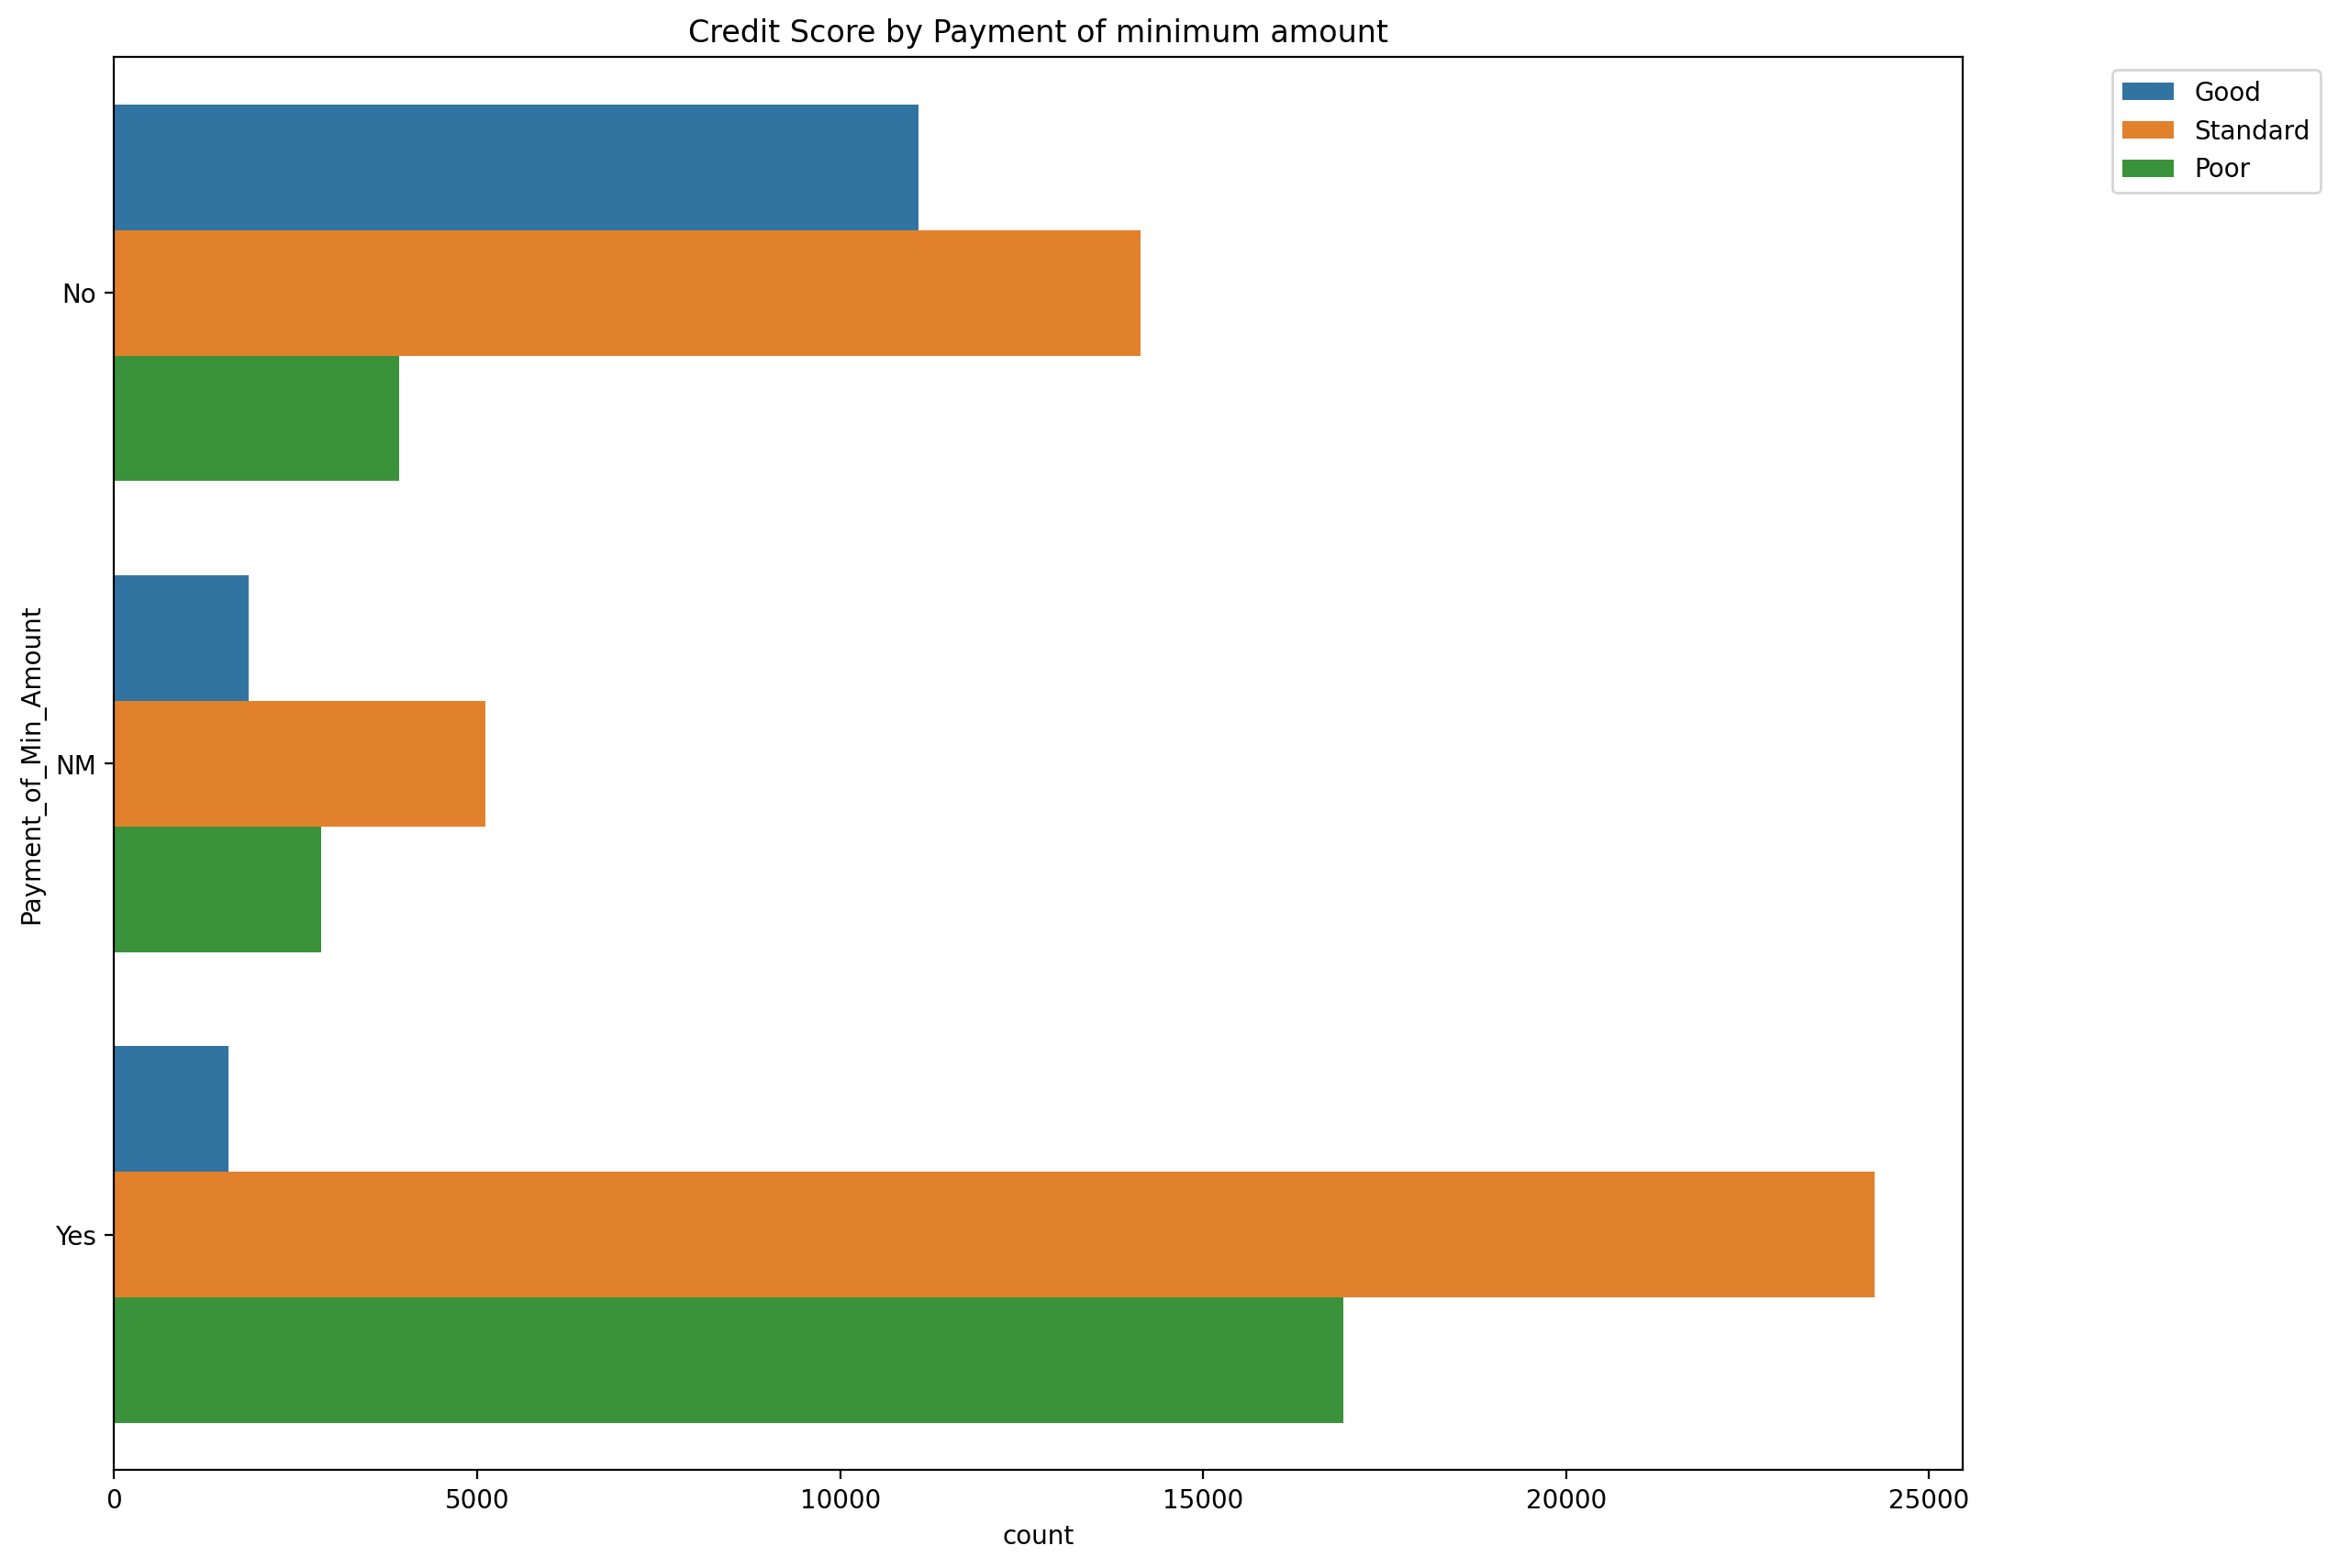

In [103]:
plt.figure(figsize=(13,10), dpi=200)
sns.countplot(data=df, y='Payment_of_Min_Amount', hue='Credit_Score')
plt.legend(bbox_to_anchor=(1.2,1.0))
plt.title('Credit Score by Payment of minimum amount');

In [104]:
df['Outstanding_Debt'].unique()

array([ 809.98,  605.03, 1303.01, ...,  620.64, 3571.7 ,  502.38])

In [105]:
# to groupby 'Outstanding_Debt' by Credit score
df.groupby('Credit_Score')['Outstanding_Debt'].describe()

,count,mean,std,min,25%,50%,75%,max
Credit_Score,,,,,,,,
Good,14513.0,801.960442,612.058394,0.23,382.1700,737.620,1150.03,4998.07
Poor,23706.0,2079.973712,1143.814986,0.54,1334.4225,1941.965,2598.36,4997.10
Standard,43503.0,1278.476524,1133.408026,0.23,489.9400,1001.620,1453.63,4998.07


In [ ]:
# for customers with 'Good', credit score, the average debt is $801
# for customers with 'Poor' credit score, the average debt is $2078

In [106]:
pd.DataFrame(df['Type_of_Loan'].value_counts())

,count
Type_of_Loan,
Not Specified,1169
Credit-Builder Loan,1056
Debt Consolidation Loan,1031
Student Loan,1030
Personal Loan,1014
...,...
"Auto Loan, Auto Loan, Not Specified, Debt Consolidation Loan, Not Specified, Credit-Builder Loan, Debt Consolidation Loan, and Personal Loan",3
"Debt Consolidation Loan, Not Specified, Not Specified, Not Specified, Credit-Builder Loan, Credit-Builder Loan, and Not Specified",2
"Personal Loan, Not Specified, Not Specified, Personal Loan, Credit-Builder Loan, Personal Loan, and Mortgage Loan",2


In [107]:
# to remove 'Age' for machine learning purpose
df = df.drop('age_categories', axis=1)

In [108]:
100*df.isnull().sum()/len(df)

Month                        0.000000
Age                          0.000000
Occupation                   0.000000
Annual_Income                0.000000
Monthly_Inhand_Salary       15.017988
Num_Bank_Accounts            0.000000
Num_Credit_Card              0.000000
Interest_Rate                0.000000
Num_of_Loan                  0.000000
Type_of_Loan                11.376374
Delay_from_due_date          0.000000
Num_of_Delayed_Payment       6.946722
Changed_Credit_Limit         2.098578
Num_Credit_Inquiries         1.944397
Credit_Mix                   0.000000
Outstanding_Debt             0.000000
Credit_Utilization_Ratio     0.000000
Payment_of_Min_Amount        0.000000
Total_EMI_per_month          0.000000
Amount_invested_monthly      4.471256
Payment_Behaviour            0.000000
Monthly_Balance              2.831551
Credit_Score                 0.000000
credit_historyage            0.000000
dtype: float64

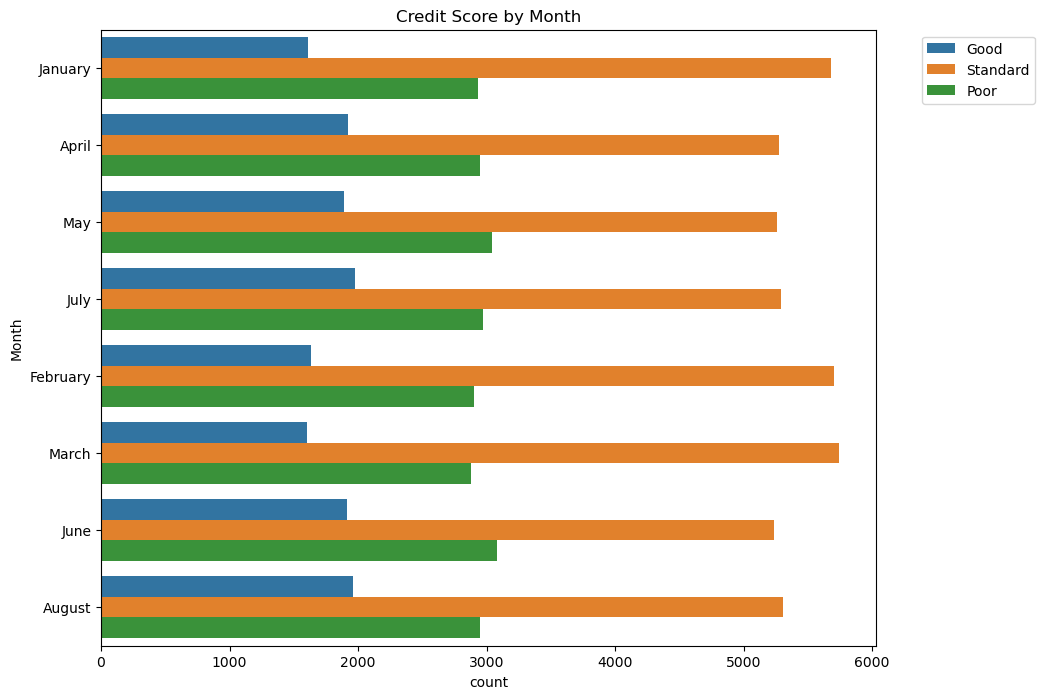

In [109]:
# it is observed that July has the highest 'Good' credit score of all month, 
plt.figure(figsize=(10,8), dpi=100)
sns.countplot(data=df, y='Month', hue='Credit_Score')
plt.legend(bbox_to_anchor=(1.05,1.0))
plt.title('Credit Score by Month');

In [112]:
# to remove all missing values from dataset
df = df.dropna()

In [114]:
# to define X and y to prepare for machine learning algorithm
X = df.drop('Credit_Score', axis=1)

In [115]:
# to convert 'object' to dummy variables before ML algorithm, drop_first=True removes the first column to prevent multicollinearity
X = pd.get_dummies(X, drop_first=True)

In [116]:
y = df['Credit_Score']

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
from sklearn.preprocessing import StandardScaler

In [119]:
# testing data = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [120]:
scaler = StandardScaler()

In [121]:
scaled_X_train = scaler.fit_transform(X_train)

In [122]:
scaled_X_test = scaler.transform(X_test)

In [123]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [124]:
from sklearn.tree import DecisionTreeClassifier

In [125]:
rf = RandomForestClassifier()

In [126]:
rf.fit(scaled_X_train,y_train)

RandomForestClassifier()

In [127]:
# to predict on the scaled_X_test data
rf_pred = rf.predict(scaled_X_test)

In [129]:
rf_pred 

array(['Standard', 'Standard', 'Standard', ..., 'Standard', 'Poor',
       'Poor'], dtype=object)

In [130]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [132]:
print(confusion_matrix(y_test,rf_pred))
print('\n')
print(classification_report(y_test,rf_pred)) # the Random Forest Classifier model = 77% accurate

[[1088    8  529]
 [  91 2411  672]
 [ 391  676 4347]]


              precision    recall  f1-score   support

        Good       0.69      0.67      0.68      1625
        Poor       0.78      0.76      0.77      3174
    Standard       0.78      0.80      0.79      5414

    accuracy                           0.77     10213
   macro avg       0.75      0.74      0.75     10213
weighted avg       0.77      0.77      0.77     10213



In [133]:
ada = AdaBoostClassifier()

In [134]:
ada.fit(scaled_X_train,y_train)

AdaBoostClassifier()

In [135]:
# to predict on the scaled_X_test data
ada_pred = ada.predict(scaled_X_test)

In [136]:
print(confusion_matrix(y_test,ada_pred))
print('\n')
print(classification_report(y_test,ada_pred)) # Accuracy rate of AdaBoost classifer model = 65%

[[ 797   30  798]
 [ 200 1861 1113]
 [ 550  860 4004]]


              precision    recall  f1-score   support

        Good       0.52      0.49      0.50      1625
        Poor       0.68      0.59      0.63      3174
    Standard       0.68      0.74      0.71      5414

    accuracy                           0.65     10213
   macro avg       0.62      0.61      0.61     10213
weighted avg       0.65      0.65      0.65     10213



In [139]:
gb = GradientBoostingClassifier()

In [140]:
gb.fit(scaled_X_train,y_train)

GradientBoostingClassifier()

In [141]:
gb_pred = gb.predict(scaled_X_test)

In [142]:
print(confusion_matrix(y_test,gb_pred))
print('\n')
print(classification_report(y_test,gb_pred)) # Accuracy rate of Gradient Boost classifier = 70%

[[ 935   16  674]
 [ 152 2137  885]
 [ 562  746 4106]]


              precision    recall  f1-score   support

        Good       0.57      0.58      0.57      1625
        Poor       0.74      0.67      0.70      3174
    Standard       0.72      0.76      0.74      5414

    accuracy                           0.70     10213
   macro avg       0.68      0.67      0.67     10213
weighted avg       0.70      0.70      0.70     10213



In [143]:
dt = DecisionTreeClassifier()

In [144]:
dt.fit(scaled_X_train,y_train)

DecisionTreeClassifier()

In [145]:
dt_pred = dt.predict(scaled_X_test)

In [146]:
print(confusion_matrix(y_test,dt_pred))
print('\n')
print(classification_report(y_test,dt_pred)) # Accuracy rate for Decision Tree classifier = 71%

[[ 981   94  550]
 [  93 2243  838]
 [ 526  818 4070]]


              precision    recall  f1-score   support

        Good       0.61      0.60      0.61      1625
        Poor       0.71      0.71      0.71      3174
    Standard       0.75      0.75      0.75      5414

    accuracy                           0.71     10213
   macro avg       0.69      0.69      0.69     10213
weighted avg       0.71      0.71      0.71     10213



In [147]:
rf_importances = rf.feature_importances_

In [148]:
X.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       ...
       'Credit_Mix_Good', 'Credit_Mix_Standard', 'Credit_Mix_unknown',
       'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_spent_Large_value_payments',
       'Payment_Behaviour_Low_spent_Medium_value_payments',
       'Payment_Behaviour_Low_spent_Small_value_payments'],
      dtype='object', length=6217)

In [149]:
# to print a dataframe of variable importance
rf_importances = pd.DataFrame(data = rf_importances, index=X.columns, columns=['Importance'])

In [150]:
rf_importances.sort_values('Importance', ascending=False)

,Importance
Outstanding_Debt,0.068686
Interest_Rate,0.054962
Delay_from_due_date,0.046894
Changed_Credit_Limit,0.042227
credit_historyage,0.039919
...,...
"Type_of_Loan_Student Loan, Debt Consolidation Loan, Credit-Builder Loan, and Auto Loan",0.000000
"Type_of_Loan_Credit-Builder Loan, Payday Loan, Home Equity Loan, Auto Loan, Payday Loan, and Home Equity Loan",0.000000
"Type_of_Loan_Mortgage Loan, Mortgage Loan, Auto Loan, and Auto Loan",0.000000
"Type_of_Loan_Credit-Builder Loan, Credit-Builder Loan, Student Loan, Credit-Builder Loan, Mortgage Loan, Not Specified, and Not Specified",0.000000


In [151]:
rf_imp = rf_importances.sort_values('Importance', ascending=False)

In [152]:
# to filter out 'Importances' less than 0.02
rf_imp = rf_imp[rf_imp['Importance'] > 0.02]

In [153]:
rf_imp

,Importance
Outstanding_Debt,0.068686
Interest_Rate,0.054962
Delay_from_due_date,0.046894
Changed_Credit_Limit,0.042227
credit_historyage,0.039919
Num_Credit_Inquiries,0.038816
Num_of_Delayed_Payment,0.037326
Num_Credit_Card,0.037159
Amount_invested_monthly,0.033901
Monthly_Inhand_Salary,0.033299


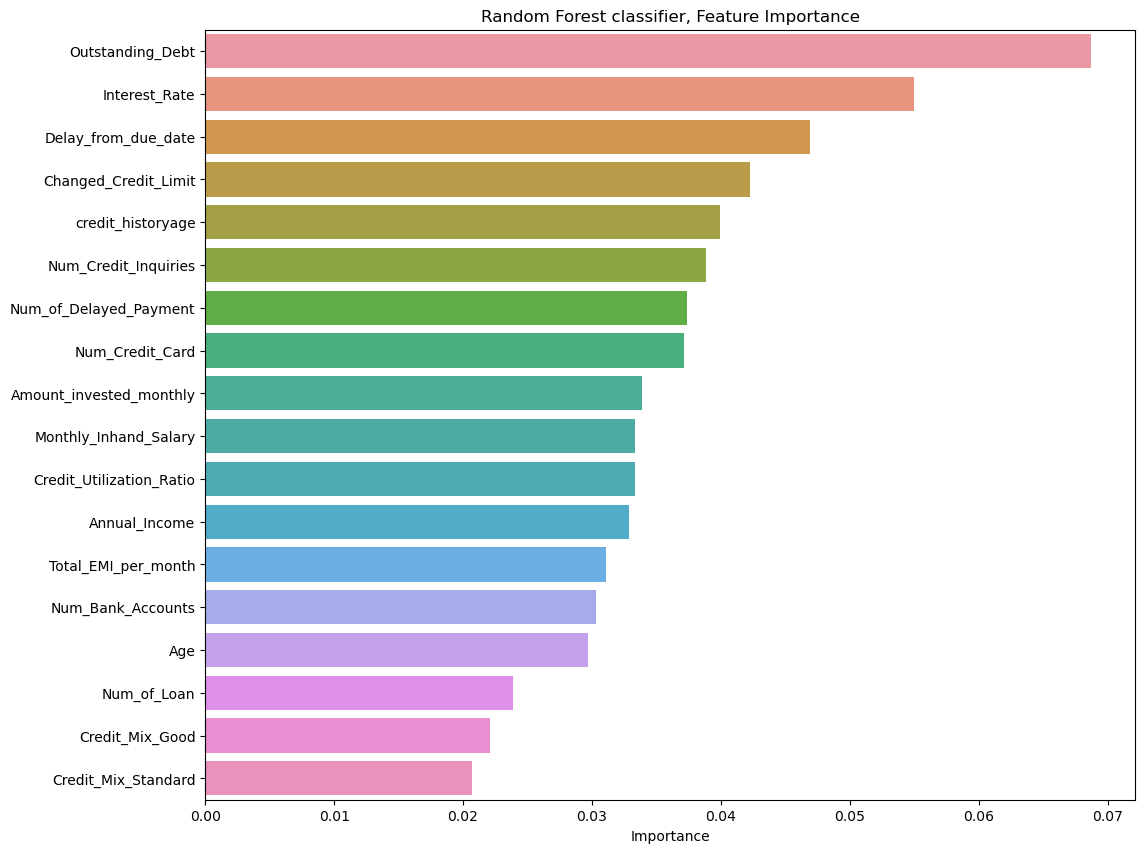

In [154]:
# Top 3 predictor of Customer's credit score: 'Outstanding Debt', 'Interest_rate', 'Changed Credit limit'
# to visualise Random Forest variable importance in a barplot.
# the Random Forest Classifier model = 77% accurate
plt.figure(figsize=(12,10), dpi=100)
sns.barplot(data=rf_imp, x='Importance', y=rf_imp.index)
plt.title('Random Forest classifier, Feature Importance');